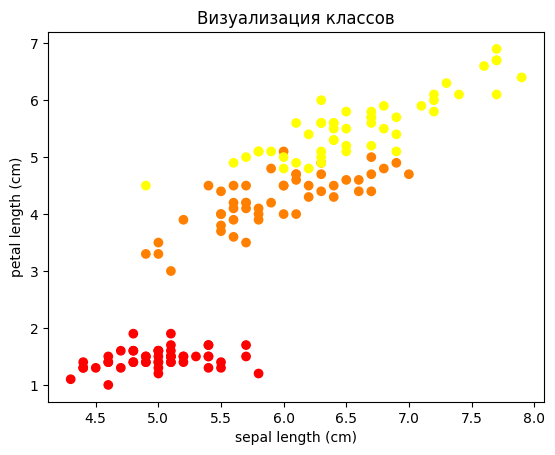

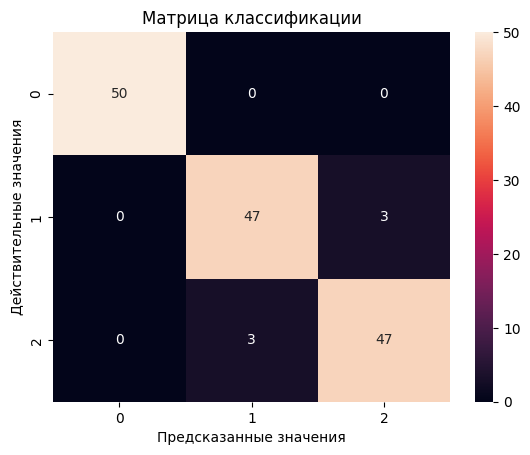

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150


/home/yeeeyoooduck/PycharmProjects/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


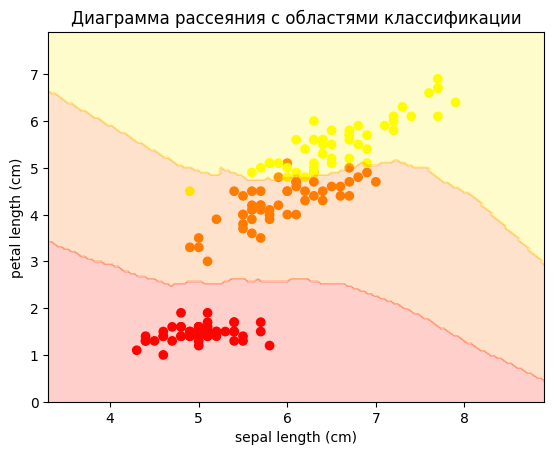

/home/yeeeyoooduck/PycharmProjects/MachineLearning/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Предсказание для нового наблюдения: [2]
Вероятности отнесения к каждому классу: [[0. 0. 1.]]


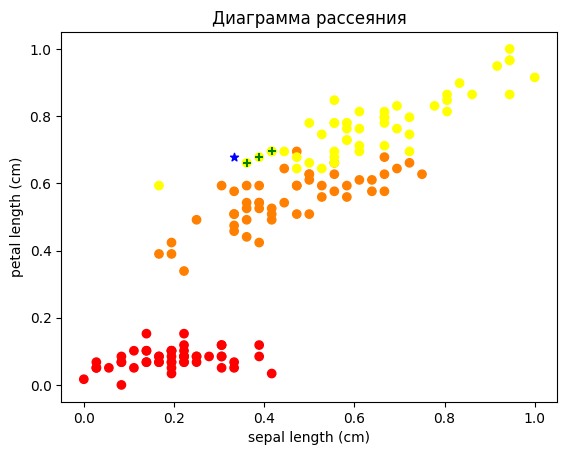

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Загрузка данных
iris = load_iris()
features = iris.data
data = pd.DataFrame(features, columns=iris.feature_names)

# Выбор признаков для визуализации
X = data.iloc[:, [0, 2]]
y = iris.target

# Визуализация данных по классам
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

# Нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Построение модели
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)

# Оценка качества модели
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print(classification_report(y_pred, y))

# Визуализация областей классификации
X0 = np.linspace(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

# Новое наблюдение
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
print("Предсказание для нового наблюдения:", knn.predict(observation_new_scaled))
print("Вероятности отнесения к каждому классу:", knn.predict_proba(observation_new_scaled))

# Визуализация ближайших соседей нового объекта
distances, indices = knn.kneighbors(observation_new_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')
plt.scatter(X_scaled[indices[0]][:, 0], X_scaled[indices[0]][:, 1], marker='+', color='g')
plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()


## Постройте последний график методических указаний в исходном пространстве признаков.

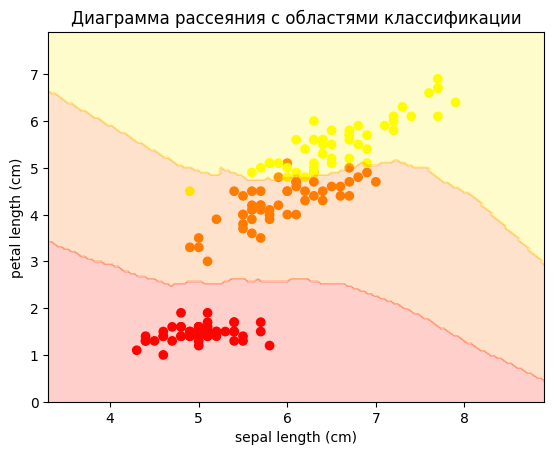

In [3]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

## Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

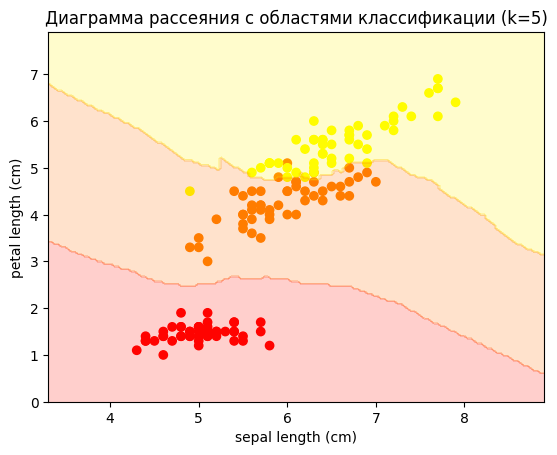

In [4]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_scaled, y)
Z_5 = knn_5.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z_5, cmap='autumn', alpha=0.2)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации (k=5)")
plt.show()


## Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разные значения k
k_values = [1, 3, 5, 7, 10]

for k in k_values:
    # Создание и обучение модели
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    
    # Предсказание на обучающем наборе
    y_pred = knn.predict(X_scaled)
    
    # Оценка точности модели
    accuracy = accuracy_score(y, y_pred)
    
    print(f"Точность модели с k={k}: {accuracy}")


Точность модели с k=1: 1.0
Точность модели с k=3: 0.9666666666666667
Точность модели с k=5: 0.96
Точность модели с k=7: 0.9666666666666667
Точность модели с k=10: 0.9666666666666667


## Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.

In [8]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Создание и обучение моделей с разными весами
models = {'uniform': KNeighborsClassifier(weights='uniform'), 'distance': KNeighborsClassifier(weights='distance')}
for weight_name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    print(f"Точность модели с весами '{weight_name}': {accuracy}")

# Этот код создает и обучает две модели с разными весами (равномерными и взвешенными по расстоянию), а затем оценивает их точность на всем наборе данных iris. Мы выводим точность для каждого варианта весов

# При установке weights='uniform' все соседи в радиусе k вносят одинаковый вклад в классификацию, тогда как при weights='distance' вес каждого соседа обратно пропорционален его расстоянию от нового наблюдения.

Точность модели с весами 'uniform': 0.96
Точность модели с весами 'distance': 1.0


## Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.

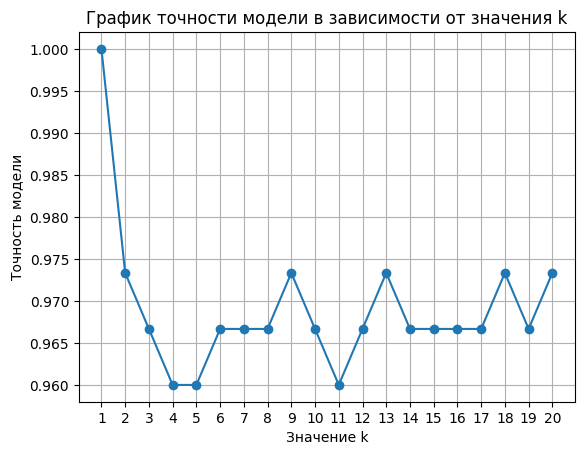

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разные значения k
k_values = np.arange(1, 21)  # Значения k от 1 до 20
accuracies = []

# Оценка точности для каждого значения k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    y_pred = knn.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    accuracies.append(accuracy)

# Построение графика
plt.plot(k_values, accuracies, marker='o')
plt.title('График точности модели в зависимости от значения k')
plt.xlabel('Значение k')
plt.ylabel('Точность модели')
plt.xticks(np.arange(1, 21, 1))  # Шаг по оси x от 1 до 20
plt.grid(True)
plt.show()

# Этот код создает модели для разных значений k от 1 до 20, оценивает их точность и сохраняет точности в списке accuracies. Затем он строит график точности модели в зависимости от значения k.

# Вывод: для выбора оптимального значения k важно провести анализ и подбор на тестовом наборе данных

# Оптимальное значение k будет зависеть от конкретного набора данных и требований к модели

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Загрузка данных
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание и обучение модели
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = knn_regressor.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse}")


# предсказывает цены на жилье на тестовом наборе данных и оценивает качество модели с помощью среднеквадратичной ошибки (MSE)

# MSE представляет собой среднее значение квадратов разностей между фактическими и предсказанными значениями. Чем меньше значение MSE, тем лучше модель способна сделать прогнозы.

# Таким образом, полученное значение MSE говорит о том, что модель, построенная с использованием метода ближайших соседей, демонстрирует хорошую точность на тестовых данных, и ее прогнозы в среднем отклоняются на 0.4072 единицы от фактических значений.

Среднеквадратичная ошибка (MSE): 0.40721540238255716
